# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartiknarayansahoo","key":"62b140f4165e92538c122f2ed13decdf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
import os

In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [ ]:

if IS_KAGGLE:
    data_dir = '../input/sentiment-analysis-on-movie-reviews'
    
    train_fname = data_dir + '/train.tsv'
    test_fname = data_dir + '/test.tsv'
    sample_fname = data_dir + '/sampleSubmission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c sentiment-analysis-on-movie-reviews
    !unzip -q sentiment-analysis-on-movie-reviews.zip -d data
    train_fname = 'data/train.tsv.zip'
    test_fname = 'data/test.tsv.zip'
    sample_fname = 'data/sampleSubmission.csv' 

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 132MB/s]


### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
len(raw_df)

156060

In [ ]:
sen0_df = raw_df[raw_df.Sentiment==0]
sen0_df

,PhraseId,SentenceId,Phrase,Sentiment
101,102,3,would have a hard time sitting through this one,0
103,104,3,have a hard time sitting through this one,0
157,158,5,Aggressive self-glorification and a manipulati...,0
159,160,5,self-glorification and a manipulative whitewash,0
201,202,7,Trouble Every Day is a plodding mess .,0
...,...,...,...,...
155965,155966,8539,has turned out nearly 21\/2 hours of unfocused...,0
155967,155968,8539,"turned out nearly 21\/2 hours of unfocused , e...",0
155970,155971,8539,"of unfocused , excruciatingly tedious cinema",0
155971,155972,8539,"unfocused , excruciatingly tedious cinema",0


In [ ]:
sen0_df.Phrase.values[:10]

array(['would have a hard time sitting through this one',
       'have a hard time sitting through this one',
       'Aggressive self-glorification and a manipulative whitewash',
       'self-glorification and a manipulative whitewash',
       'Trouble Every Day is a plodding mess .', 'is a plodding mess',
       'plodding mess', 'could hate it for the same reason', 'hate it',
       'hate'], dtype=object)

In [ ]:
sen1_df = raw_df[raw_df.Sentiment==1]
sen1_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
33,34,1,"the gander , some of which occasionally amuses...",1
47,48,1,but none of which amounts to much of a story,1
49,50,1,none of which amounts to much of a story,1
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
...,...,...,...,...
156036,156037,8543,substitute plot for personality,1
156047,156048,8544,quietly suggesting the sadness and obsession b...,1
156051,156052,8544,sadness and obsession,1
156052,156053,8544,sadness and,1


In [ ]:
sen1_df.Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'but none of which amounts to much of a story',
       'none of which amounts to much of a story',
       "Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
       ', I suspect , would have a hard time sitting through this one .',
       'would have a hard time sitting through this one .',
       'a hard time sitting through this one', 'a hard time', 'hard time'],
      dtype=object)

In [ ]:
sen2_df = raw_df[raw_df.Sentiment==2]
sen2_df

,PhraseId,SentenceId,Phrase,Sentiment
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
...,...,...,...,...
156053,156054,8544,beneath Hearst 's forced avuncular chortles,2
156054,156055,8544,Hearst 's forced avuncular chortles,2
156055,156056,8544,Hearst 's,2
156058,156059,8544,avuncular,2


In [ ]:
sen2_df.Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose',
       'demonstrating the adage'], dtype=object)

In [ ]:
sen3_df = raw_df[raw_df.Sentiment==3]
sen3_df

,PhraseId,SentenceId,Phrase,Sentiment
21,22,1,good for the goose,3
22,23,1,good,3
46,47,1,amuses,3
64,65,2,"This quiet , introspective and entertaining in...",3
67,68,2,"quiet , introspective and entertaining",3
...,...,...,...,...
156012,156013,8541,great job,3
156014,156015,8541,anchoring the characters in the emotional real...,3
156023,156024,8542,-LRB- Tries -RRB-,3
156043,156044,8544,is darkly atmospheric,3


In [ ]:
sen3_df.Phrase.values[:10]

array(['good for the goose', 'good', 'amuses',
       'This quiet , introspective and entertaining independent',
       'quiet , introspective and entertaining',
       ', introspective and entertaining',
       'introspective and entertaining', 'introspective and',
       'is worth seeking .', 'fans'], dtype=object)

In [ ]:
sen4_df = raw_df[raw_df.Sentiment==4]
sen4_df

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
66,67,2,"quiet , introspective and entertaining indepen...",4
74,75,2,entertaining,4
77,78,2,is worth seeking,4
117,118,4,A positively thrilling combination of ethnogra...,4
...,...,...,...,...
155946,155947,8537,is laughingly enjoyable,4
155955,155956,8538,a unique culture that is presented with univer...,4
155961,155962,8538,with universal appeal,4
156007,156008,8541,really do a great job of anchoring the charact...,4


In [ ]:
sen4_df.Phrase.values[:10]

array(['This quiet , introspective and entertaining independent is worth seeking .',
       'quiet , introspective and entertaining independent',
       'entertaining', 'is worth seeking',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder',
       'thrilling',
       'A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .',
       'nearly epic',
       'rooted in a sincere performance by the title character undergoing midlife crisis .'],
      dtype=object)

In [ ]:
raw_df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
raw_df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

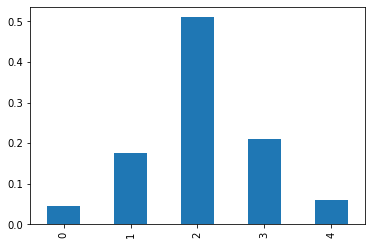

In [ ]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
test_df = pd.read_csv(test_fname, sep='\t')

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_df.Phrase.values[:10]

array(['An intermittently pleasing but mostly routine effort .',
       'An intermittently pleasing but mostly routine effort', 'An',
       'intermittently pleasing but mostly routine effort',
       'intermittently pleasing but mostly routine',
       'intermittently pleasing but', 'intermittently pleasing',
       'intermittently', 'pleasing', 'but'], dtype=object)

In [ ]:
sub_df = pd.read_csv(sample_fname)

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment.value_counts()

2    66292
Name: Sentiment, dtype: int64

Summarize your insights and learnings from the dataset below:

* Disproportionate sentiment labels, highest for neutral and lowest for postive and negative (suggest gaussian distribution)
* Train dataset contains sentences which are broken into many phases, i.e. a single sentences is broken into different phases each of which is a row in the dataset
* These phrases have unique phraseID but same sentenceID

### Creating a working sample

In [ ]:
sample_df = raw_df

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text) if word.isalpha()]

In [ ]:
tokenize('Is this (really) life, or is this; 56  a fantasy?')

['is', 'this', 'realli', 'life', 'or', 'is', 'this', 'a', 'fantasi']

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
', '.join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# excluding negative words from stopwords for sentiment analysis
', '.join(english_stopwords[:116])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such"

In [ ]:
selected_stopwords = english_stopwords[:116]

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [ ]:
sample_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
%%time
vectorizer.fit(sample_df.Phrase)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 22.6 s, sys: 86.6 ms, total: 22.7 s
Wall time: 22.7 s


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fb4f5a4cb80>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:300]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.Phrase)

CPU times: user 22.6 s, sys: 49.1 ms, total: 22.6 s
Wall time: 22.7 s


In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 472376 stored elements in Compressed Sparse Row format>

In [ ]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
sample_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = sample_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_targets.shape, train_inputs.shape 

((110000,), (110000, 2000))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets =  sample_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(class_weight='balanced')

In [ ]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

## Train Random Forest model

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
sc = MaxAbsScaler()
train_inputs = sc.fit_transform(train_inputs)
val_inputs = sc.transform(val_inputs)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, class_weight='balanced')
model.fit(train_inputs, train_targets)

CPU times: user 8min 1s, sys: 734 ms, total: 8min 2s
Wall time: 8min


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

### Predictions

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
pd.Series(train_preds)

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    1
109997    1
109998    1
109999    2
Length: 110000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.7898818181818181

In [ ]:
f1_score(train_targets, train_preds, average='macro')

0.7385272600742898

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5608554059921841

In [ ]:
f1_score(val_targets, val_preds, average='macro')

0.3647396809750063

### Study Predictions on Sample Inputs

In [ ]:
small_df = sample_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
71771,71772,3661,compelling dramatic,3
40376,40377,1932,hampered by Taylor 's cartoonish performance a...,0
53339,53340,2646,somber blues and pinks,2
131099,131100,7064,of light,2
133558,133559,7205,comedy franchise,2
111760,111761,5931,fluttering and stammering,2
65866,65867,3340,to the power of women to heal,3
25726,25727,1175,the chilly anonymity,2
145472,145473,7907,you 've been watching all this strutting and p...,2
82036,82037,4232,astute direction,2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
sub_df.Sentiment = test_preds    

In [ ]:
sub_df.to_csv('submission.csv', index=False)